# Given the hourly trips data on city B, we have four tasks:
1. Exploratory data analysis
2. Propose any advice to passenger operation team based on your findings
3. Propose any advice to driver operation team based on your findings
4. State further data needed if deepen your analysis

# 1.Exploratory data analysis

1.1. Read Data

The data was renamed as didi.xlsx and I made some small adjustments on the datasets.The new dataset and code file could be accessed by the link ttps://github.com/YufeiGao026/DIDI.git

In [187]:
# --- Imports ---
import pandas as pd # import libraries, and set pd as the pandas alias
import numpy as np
import matplotlib.pyplot as plt

# run this command too - just to allow more data to be displayed than default
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',1000)
# this one ensures graphs properly display in the notebook
%matplotlib inline

In [172]:
path=r'C:\Users\Yufei\Desktop\didi.xlsx'
data=pd.read_excel(path)

1.2. Introduction to Data

In this part, we could have a general understanding of the dataset by looking at the first few rows. We could also know the number of the data in each column in the dataset. We could know that size of the dataset. We could check data type and the consistency of the data.

As shown below,this data set has 9 columns and 90 rows.the data type include datetime64[ns], int64 and float64. In addition, the dataset is consistent without missing data.

In [174]:
# have a general understanding of the dataset by looking at the first few rows
data.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      90 non-null     datetime64[ns]
 1   hour                      90 non-null     int64         
 2   requests                  90 non-null     int64         
 3   trips                     90 non-null     int64         
 4   supply hours              90 non-null     float64       
 5   average minutes of trips  90 non-null     float64       
 6   pETA                      90 non-null     float64       
 7   aETA                      90 non-null     float64       
 8   utiliz                    90 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 6.5 KB


1.3. Mean, Variace and Percentile

In [182]:
data.describe()

,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000
mean,12.000000,234.411111,149.833333,52.807111,29.051333,5.758556,7.19900,0.558130
std,0.821071,143.187933,105.484889,22.480067,14.343199,1.079037,1.23975,0.159561
min,11.000000,15.000000,6.000000,11.250000,9.050000,2.430000,4.61000,0.299312
25%,11.000000,91.250000,50.000000,32.417500,16.025000,5.085000,6.38250,0.427019
50%,12.000000,234.500000,138.000000,52.570000,27.495000,5.725000,7.06500,0.534818
75%,13.000000,327.750000,238.000000,67.135000,39.055000,6.475000,8.04750,0.669226
max,13.000000,558.000000,420.000000,118.930000,73.620000,8.050000,12.06000,0.970345


1.4.Relationship between every time interval and Each Variale

We found that:
(1)'pETA' is slightly larger than the 'aETA'.
The company's prediction of the time that a customer has to wait to be picked up by a driver is smaller than the actual value. The cmpany should adjust their calculation method on the customers' waiting time.

(2)‘Request’is greatly larger than the ‘trips'.

(3)'Request','Trips'and 'Supply hours' have similar trends.

(4)It seems that utiliz reached the peak in the middle of the month.

(5)According to the figures below expect utiliz,it seems that it had a cyclical change.

(6)There were 420 orders at 12:00 on September 21 and 6 orders at 13:00 on September 25.

(7)On September 17, there was the smallest driver, utilize0.29, and on September 15th, at 13:00, there was the largest utility 0.97。

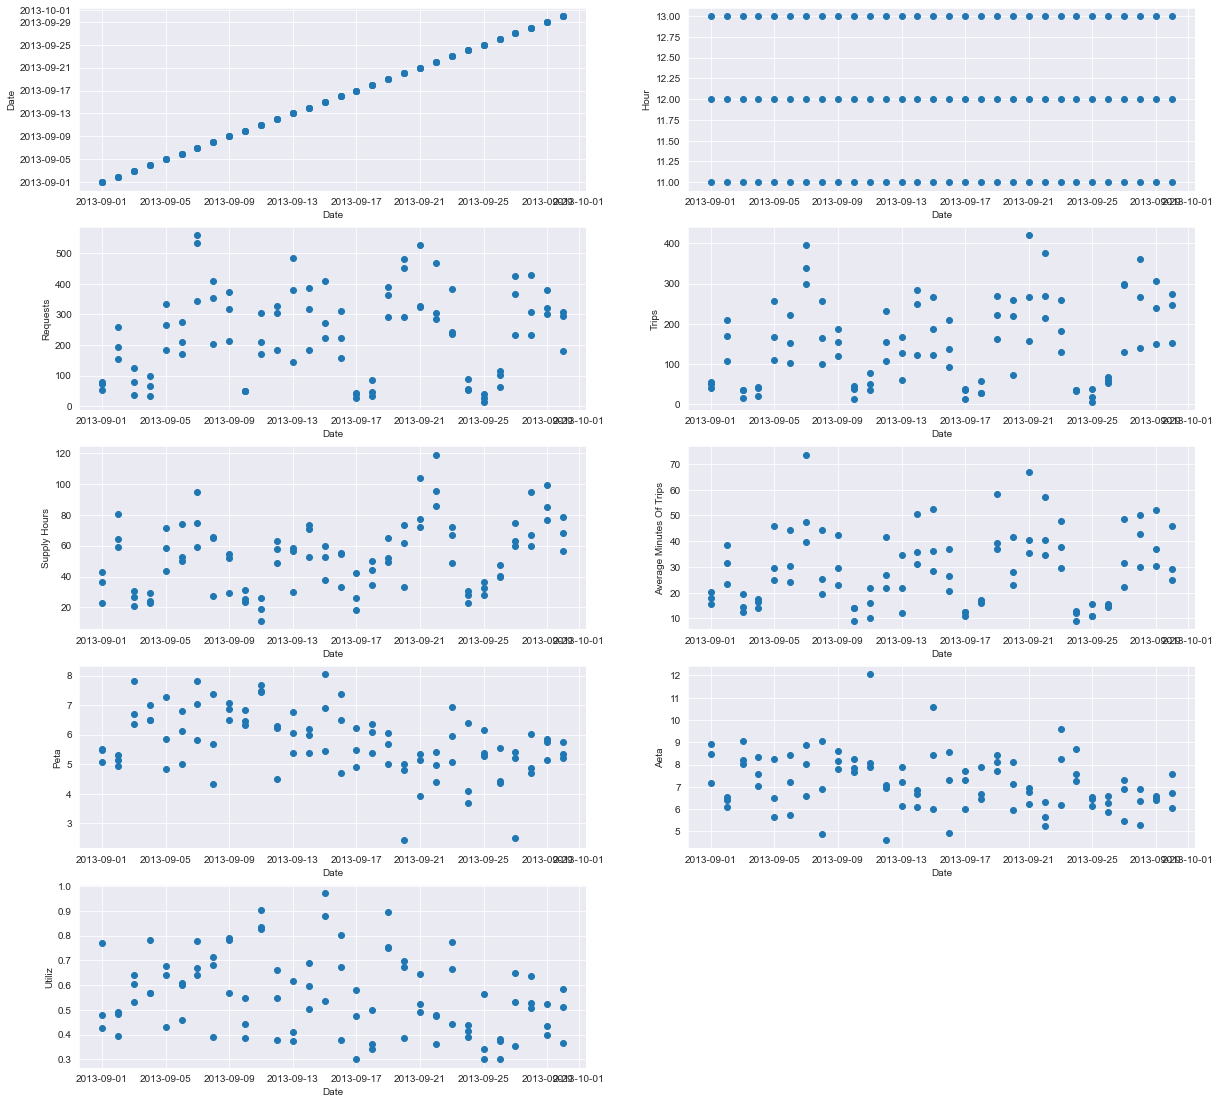

In [185]:
plt.figure(figsize=(20,19.5))
plot_count = 1
for feature in list(data.columns)[:9]:
        plt.subplot(5,2,plot_count)
        plt.scatter( data['date'],data[feature])
        plt.ylabel(feature.replace('_',' ').title())
        plt.xlabel('Date')
        plot_count+=1

plt.show()

In [184]:
data.groupby("date").agg([np.mean,np.sum,np.std])

hour             requests                         trips        \
           mean sum  std        mean   sum         std        mean   sum   
date                                                                       
2013-09-01   12  36  1.0   68.666667   206   13.051181   48.666667   146   
2013-09-02   12  36  1.0  201.333333   604   52.993710  162.333333   487   
2013-09-03   12  36  1.0   79.333333   238   44.015149   27.666667    83   
2013-09-04   12  36  1.0   66.333333   199   32.005208   34.000000   102   
2013-09-05   12  36  1.0  260.666667   782   75.055535  177.333333   532   
2013-09-06   12  36  1.0  218.000000   654   52.716221  158.000000   474   
2013-09-07   12  36  1.0  477.333333  1432  117.920877  344.666667  1034   
2013-09-08   12  36  1.0  321.666667   965  106.255980  173.666667   521   
2013-09-09   12  36  1.0  301.000000   903   80.851716  154.000000   462   
2013-09-10   12  36  1.0   48.666667   146    0.577350   31.333333    94   
2013-09-11   12  36  1.0  228.333333   685   70.030946   53.333333   160   
2013-09-12   12  36  1.0  272.000000   816   76.216796  164.666667   494   
2013-09-13   12  36  1.0  335.333333  1006  173.667306  118.000000   354   
2013-09-14   12  36  1.0  295.666667   887  101.692346  219.000000   657   
2013-09-15   12  36  1.0  301.333333   904   96.666092  191.333333   574   
2013-09-16   12  36  1.0  230.666667   692   77.364936  145.666667   437   
2013-09-17   12  36  1.0   37.000000   111    9.643651   28.000000    84   
2013-09-18   12  36  1.0   54.000000   162   27.622455   37.000000   111   
2013-09-19   12  36  1.0  347.666667  1043   51.481388  217.000000   651   
2013-09-20   12  36  1.0  409.000000  1227  102.357218  183.000000   549   
2013-09-21   12  36  1.0  393.000000  1179  116.940156  280.666667   842   
2013-09-22   12  36  1.0  353.333333  1060  100.719081  286.666667   860   
2013-09-23   12  36  1.0  286.666667   860   82.615576  191.000000   573   
2013-09-24   12  36  1.0   66.000000   198   19.974984   34.000000   102   
2013-09-25   12  36  1.0   27.333333    82   13.051181   20.333333    61   
2013-09-26   12  36  1.0   93.000000   279   27.622455   60.000000   180   
2013-09-27   12  36  1.0  341.666667  1025   98.774153  242.000000   726   
2013-09-28   12  36  1.0  323.000000   969   98.361578  255.666667   767   
2013-09-29   12  36  1.0  333.666667  1001   39.551654  231.666667   695   
2013-09-30   12  36  1.0  260.666667   782   70.116570  224.333333   673   

                       supply hours                     \
                   std         mean     sum        std   
date                                                     
2013-09-01    7.094599    34.026667  102.08  10.023474   
2013-09-02   51.926230    67.886667  203.66  11.022528   
2013-09-03   10.969655    26.170000   78.51   4.979709   
2013-09-04   12.288206    25.390000   76.17   3.400397   
2013-09-05   74.042780    57.873333  173.62  13.825413   
2013-09-06   60.802960    58.810000  176.43  13.050011   
2013-09-07   49.166384    76.090000  228.27  17.957636   
2013-09-08   78.945129    52.586667  157.76  21.730351   
2013-09-09   33.511192    45.150000  135.45  13.931184   
2013-09-10   17.009801    26.826667   80.48   4.140366   
2013-09-11   21.197484    18.876667   56.63   7.479615   
2013-09-12   63.058174    56.613333  169.84   7.173990   
2013-09-13   53.702886    48.126667  144.38  16.005313   
2013-09-14   84.858706    65.510000  196.53  11.305782   
2013-09-15   73.145973    49.956667  149.87  11.430137   
2013-09-16   60.086049    47.536667  142.61  12.609228   
2013-09-17   13.892444    28.993333   86.98  12.024975   
2013-09-18   16.462078    42.776667  128.33   7.776672   
2013-09-19   53.674948    55.490000  166.47   8.468577   
2013-09-20   99.242128    56.033333  168.10  20.732432   
2013-09-21  132.609703    84.350000  253.05  17.304262   
2013-09-22   81.941036    99.960000  299.88  17.130870   
2013-09-23   65.368188    62.526667  187.58  12.1918

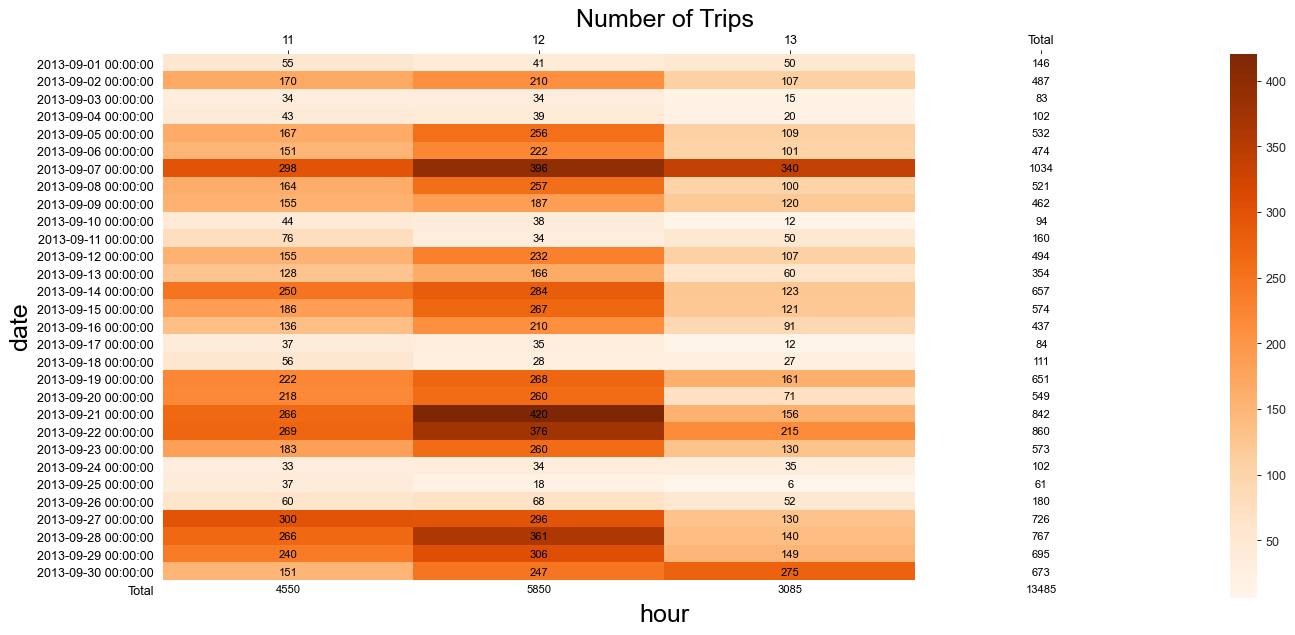

In [202]:
from matplotlib.collections import QuadMesh
from matplotlib.text import Text
import numpy as np

#Creating columns for hour of weekday
#weekdaymatrix = pd.DataFrame()
#weekdaymatrix['Weekday'] = pd.DatetimeIndex(crime.index).weekday

#Manipulating data to feed pivot table to then feed to seaborn heatmap
incidents_wh = data.groupby(['hour', 'date'])['trips'].sum()
incidents_wh = incidents_wh.reset_index(level=[0,1]) # to go from mutlindex to singleidnex
pivoted_table = incidents_wh.pivot(index='date', columns='hour', values='trips')
pivoted_table.fillna(0, inplace=True)

#Select max value from the data
max_value = pivoted_table.max().max()

#Create sum for rows and columns
pivoted_table.loc['Total'] = pivoted_table.sum()
pivoted_table = pd.concat([pivoted_table,pd.DataFrame(pivoted_table.sum(axis=1),columns=['Total'])],axis=1)

#Generate heatmap
plt.figure(figsize=(18, 8), dpi=90)
ax = sns.heatmap(pivoted_table, cmap='Oranges', annot=True, fmt='g', annot_kws={'size': 9}, vmax=max_value)

#Set white color to total column and row
# find your QuadMesh object and get array of colors
quadmesh = ax.findobj(QuadMesh)[0]
facecolors = quadmesh.get_facecolors()

# make colors of the last column white
column_number = pivoted_table.shape[1]
cells_number = pivoted_table.shape[0]*pivoted_table.shape[1]
last_row = pivoted_table.shape[1]*(pivoted_table.shape[0]-1)

facecolors[np.arange(column_number-1,cells_number,column_number)] = np.array([1,1,1,1]) #change column total to white
facecolors[np.arange(last_row, cells_number,1)] = np.array([1,1,1,1]) #change row total to white

# set modified colors
quadmesh.set_facecolors = facecolors

# set color of all text to black
for i in ax.findobj(Text):
    i.set_color('black') 

#Labels
labels = ['11', '12', '13', 'Total']
ax.set_xticklabels(labels)
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.title('Number of Trips', fontsize=20, y=1.05)
plt.xlabel('hour', fontsize=20)
plt.ylabel('date', fontsize=20);

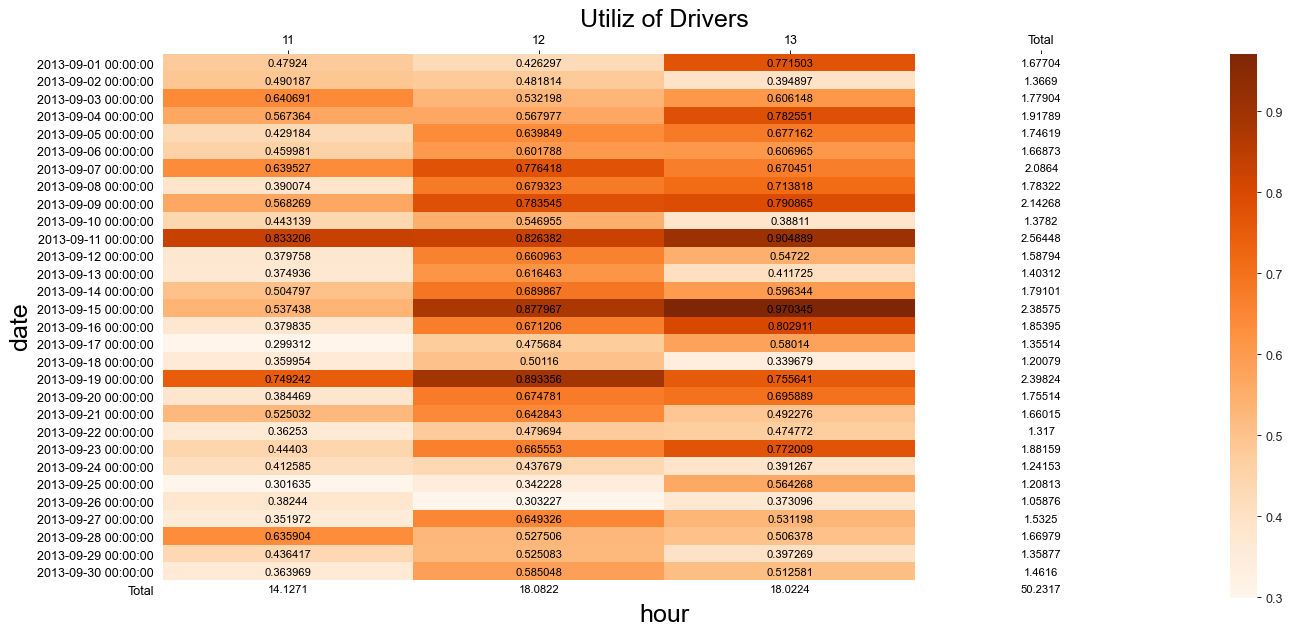

In [203]:
from matplotlib.collections import QuadMesh
from matplotlib.text import Text
import numpy as np

#Creating columns for hour of weekday
#weekdaymatrix = pd.DataFrame()
#weekdaymatrix['Weekday'] = pd.DatetimeIndex(crime.index).weekday

#Manipulating data to feed pivot table to then feed to seaborn heatmap
incidents_wh = data.groupby(['hour', 'date'])['utiliz'].sum()
incidents_wh = incidents_wh.reset_index(level=[0,1]) # to go from mutlindex to singleidnex
pivoted_table = incidents_wh.pivot(index='date', columns='hour', values='utiliz')
pivoted_table.fillna(0, inplace=True)

#Select max value from the data
max_value = pivoted_table.max().max()

#Create sum for rows and columns
pivoted_table.loc['Total'] = pivoted_table.sum()
pivoted_table = pd.concat([pivoted_table,pd.DataFrame(pivoted_table.sum(axis=1),columns=['Total'])],axis=1)

#Generate heatmap
plt.figure(figsize=(18, 8), dpi=90)
ax = sns.heatmap(pivoted_table, cmap='Oranges', annot=True, fmt='g', annot_kws={'size': 9}, vmax=max_value)

#Set white color to total column and row
# find your QuadMesh object and get array of colors
quadmesh = ax.findobj(QuadMesh)[0]
facecolors = quadmesh.get_facecolors()

# make colors of the last column white
column_number = pivoted_table.shape[1]
cells_number = pivoted_table.shape[0]*pivoted_table.shape[1]
last_row = pivoted_table.shape[1]*(pivoted_table.shape[0]-1)

facecolors[np.arange(column_number-1,cells_number,column_number)] = np.array([1,1,1,1]) #change column total to white
facecolors[np.arange(last_row, cells_number,1)] = np.array([1,1,1,1]) #change row total to white

# set modified colors
quadmesh.set_facecolors = facecolors

# set color of all text to black
for i in ax.findobj(Text):
    i.set_color('black') 

#Labels
labels = ['11', '12', '13', 'Total']
ax.set_xticklabels(labels)
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.title('Utiliz of Drivers', fontsize=20, y=1.05)
plt.xlabel('hour', fontsize=20)
plt.ylabel('date', fontsize=20);

1.5.Relationship between day and Each Variale

We aggregated the data for a day, so the oserved data decreased from 90 to 30.

We found the similar conclusion in part 1.4.

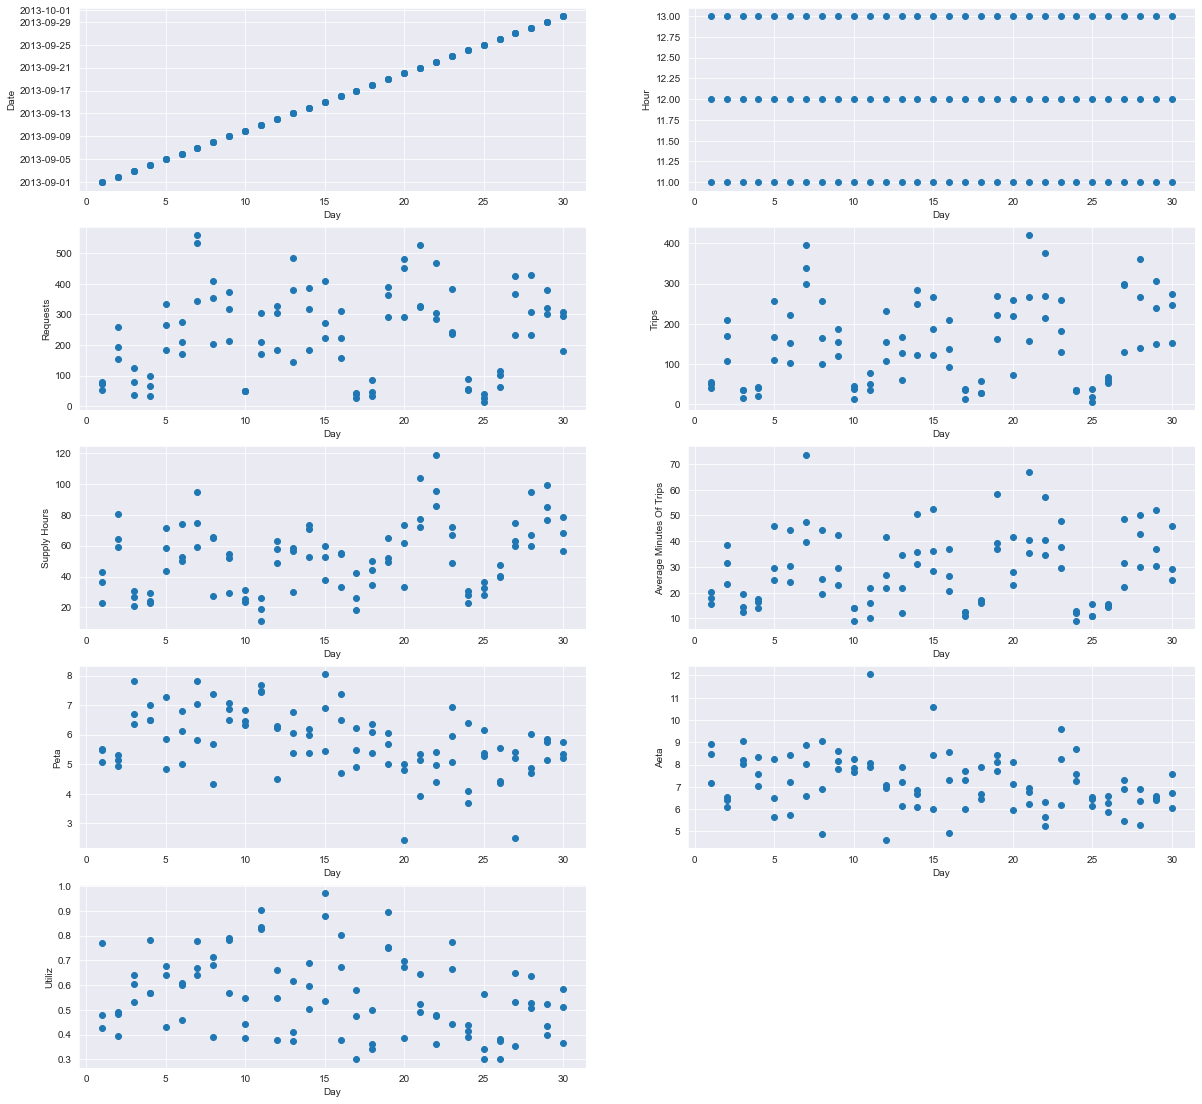

In [191]:
data['Day'] = data['date'].dt.day


plt.figure(figsize=(20,19.5))
plot_count = 1
for feature in list(data.columns)[:9]:
        plt.subplot(5,2,plot_count)
        plt.scatter( data['Day'],data[feature])
        plt.ylabel(feature.replace('_',' ').title())
        plt.xlabel('Day')
        plot_count+=1

plt.show()

In [192]:
data.groupby("Day").agg([np.mean,np.sum,np.std])

hour             requests                         trips                    \
    mean sum  std        mean   sum         std        mean   sum         std   
Day                                                                             
1     12  36  1.0   68.666667   206   13.051181   48.666667   146    7.094599   
2     12  36  1.0  201.333333   604   52.993710  162.333333   487   51.926230   
3     12  36  1.0   79.333333   238   44.015149   27.666667    83   10.969655   
4     12  36  1.0   66.333333   199   32.005208   34.000000   102   12.288206   
5     12  36  1.0  260.666667   782   75.055535  177.333333   532   74.042780   
6     12  36  1.0  218.000000   654   52.716221  158.000000   474   60.802960   
7     12  36  1.0  477.333333  1432  117.920877  344.666667  1034   49.166384   
8     12  36  1.0  321.666667   965  106.255980  173.666667   521   78.945129   
9     12  36  1.0  301.000000   903   80.851716  154.000000   462   33.511192   
10    12  36  1.0   48.666667   146    0.577350   31.333333    94   17.009801   
11    12  36  1.0  228.333333   685   70.030946   53.333333   160   21.197484   
12    12  36  1.0  272.000000   816   76.216796  164.666667   494   63.058174   
13    12  36  1.0  335.333333  1006  173.667306  118.000000   354   53.702886   
14    12  36  1.0  295.666667   887  101.692346  219.000000   657   84.858706   
15    12  36  1.0  301.333333   904   96.666092  191.333333   574   73.145973   
16    12  36  1.0  230.666667   692   77.364936  145.666667   437   60.086049   
17    12  36  1.0   37.000000   111    9.643651   28.000000    84   13.892444   
18    12  36  1.0   54.000000   162   27.622455   37.000000   111   16.462078   
19    12  36  1.0  347.666667  1043   51.481388  217.000000   651   53.674948   
20    12  36  1.0  409.000000  1227  102.357218  183.000000   549   99.242128   
21    12  36  1.0  393.000000  1179  116.940156  280.666667   842  132.609703   
22    12  36  1.0  353.333333  1060  100.719081  286.666667   860   81.941036   
23    12  36  1.0  286.666667   860   82.615576  191.000000   573   65.368188   
24    12  36  1.0   66.000000   198   19.974984   34.000000   102    1.000000   
25    12  36  1.0   27.333333    82   13.051181   20.333333    61   15.631165   
26    12  36  1.0   93.000000   279   27.622455   60.000000   180    8.000000   
27    12  36  1.0  341.666667  1025   98.774153  242.000000   726   97.015463   
28    12  36  1.0  323.000000   969   98.361578  255.666667   767  110.861776   
29    12  36  1.0  333.666667  1001   39.551654  231.666667   695   78.831043   
30    12  36  1.0  260.666667   782   70.116570  224.333333   673   65.033325   

    supply hours                    average minutes of trips          \
            mean     sum        std                     mean     sum   
Day                                                                    
1      34.026667  102.08  10.023474                17.906667   53.72   
2      67.886667  203.66  11.022528                31.173333   93.52   
3      26.170000   78.51   4.979709                15.550000   46.65   
4      25.390000   76.17   3.400397                16.030000   48.09   
5      57.873333  173.62  13.825413                33.480000  100.44   
6      58.810000  176.43  13.050011                33.003333   99.01   
7      76.090000  228.27  17.957636                53.596667  160.79   
8      52.586667  157.76  21.730351                29.803333   89.41   
9      45.150000  135.45  13.931184                31.716667   95.15   
10     26.826667   80.48   4.140366                12.336667   37.01   
11     18.876667   56.63   7.479615                15.953333   47.86   
12     56.613333  169.84   7.173990                30.146667   90.44   
13     48.126667  144.38  16.005313                22.946667   68.84   
14     65.510000  196.53  11.305782                39.183333  117.55   
15     49.956667  149.87  11.430137                39.040000  117.12   
16     47.536667  142.61  12.60922

1.6.Relationship between Weekday and Each Variale

We should also considered that there are five Sundays and Mondays, the rest of weekday only has four days.
We found that:

(1)Tuesday has the least average requests and trips, and the second least is Wednesday.
What's puzzling is that the order volume on Tuesday and Wednesday is far less than that at other times. In addition, the supply hours on Tuesday and Wednesday are far less than those at other times. Customers won't suddenly reduce their travel demand at a certain time, so we have reason to doubt whether it is due to insufficient supply of drivers on Tuesday and Wednesday that leads to the drop of customers' orders.

(2)The driver 'supply hour' on Tuesday was also the least, followed by Wednesday.

(3)The average travel time of customers on Tuesday was also the least, followed by Wednesday.

(4) 'PETA' is also slightly larger than the 'AETA'.

(5)There was the largest average order volume of 365 at 12 o'clock on Saturday, and the minimum order volume at 13:00 on Tuesday was 19.

(6)There is a maximum utilize0.66 at 12:00 on Saturday and a minimum of 0.39 at 11:00 on Friday.

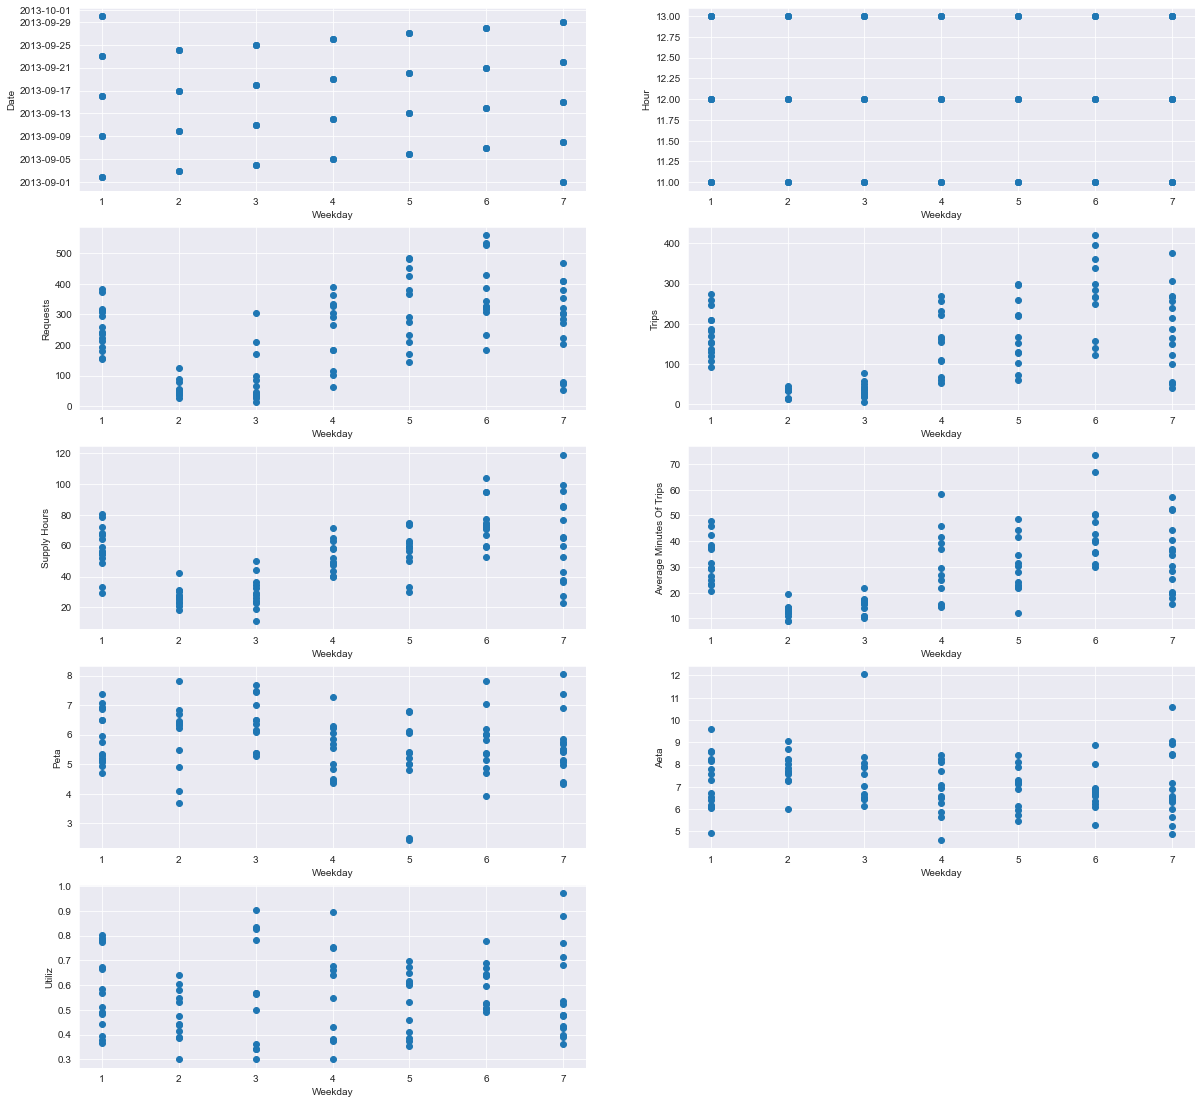

In [194]:
data['Weekday'] = data['date'].dt.weekday + 1

plt.figure(figsize=(20,19.5))
plot_count = 1
for feature in list(data.columns)[:9]:
        plt.subplot(5,2,plot_count)
        plt.scatter( data['Weekday'],data[feature])
        plt.ylabel(feature.replace('_',' ').title())
        plt.xlabel('Weekday')
        plot_count+=1

plt.show()

In [195]:
data.groupby("Weekday").agg([np.mean,np.sum,np.std])

hour                   requests                         trips        \
        mean  sum       std        mean   sum         std        mean   sum   
Weekday                                                                       
1         12  180  0.845154  256.066667  3841   72.701412  175.466667  2632   
2         12  144  0.852803   57.750000   693   26.968416   30.250000   363   
3         12  144  0.852803   94.000000  1128   89.589975   36.166667   434   
4         12  144  0.852803  243.333333  2920  110.179468  154.750000  1857   
5         12  144  0.852803  326.000000  3912  121.730701  175.250000  2103   
6         12  144  0.852803  372.250000  4467  118.507480  275.000000  3300   
7         12  180  0.845154  275.733333  4136  128.198210  186.400000  2796   

                    supply hours                    average minutes of trips  \
                std         mean     sum        std                     mean   
Weekday                                                                        
1         56.261972    58.180667  872.71  14.497757                32.520667   
2         10.821905    27.320833  327.85   6.152710                12.794167   
3         18.789907    29.832500  357.99  10.593526                15.321667   
4         76.983026    53.114167  637.37  10.140519                30.826667   
5         83.097013    57.219167  686.63  14.548473                30.270000   
6         97.315793    74.973333  899.68  15.774568                45.345833   
7        101.030971    64.694000  970.41  28.503639                34.140667   

                                pETA                       aETA          \
            sum        std      mean    sum       std      mean     sum   
Weekday                                                                   
1        487.81   8.584843  5.911333  88.67  0.889284  7.251333  108.77   
2        153.53   2.765793  5.940000  71.28  1.185204  7.797500   93.57   
3        183.86   3.325209  6.435000  77.22  0.834293  7.588333   91.06   
4        369.92  13.799934  5.501667  66.02  0.899382  6.832500   81.99   
5        363.24  10.641596  5.125833  61.51  1.407283  6.966667   83.60   
6        544.15  13.487607  5.685833  68.23  1.045870  6.807500   81.69   
7        512.11  13.326055  5.689333  85.34  1.026864  7.148667  107.23   

                     utiliz                       Day                  
              std      mean       sum       std  mean  sum        std  
Weekday                                                                
1        1.255894  0.580448  8.706719  0.158111  16.0  240  10.246951  
2        0.771576  0.479492  5.753908  0.102534  13.5  162   8.174239  
3        1.590676  0.574274  6.891293  0.216998  14.5  174   8.174239  
4        1.157930  0.565928  6.791138  0.190035  15.5  186   8.174239  
5        0.953122  0.529958  6.359492  0.126880  16.5  198   8.174239  
6        0.920031  0.600612  7.207344  0.090034  17.5  210   8.174239  
7        1.603121  0.568118  8.521772  0.189094  15.0  225  10.246951

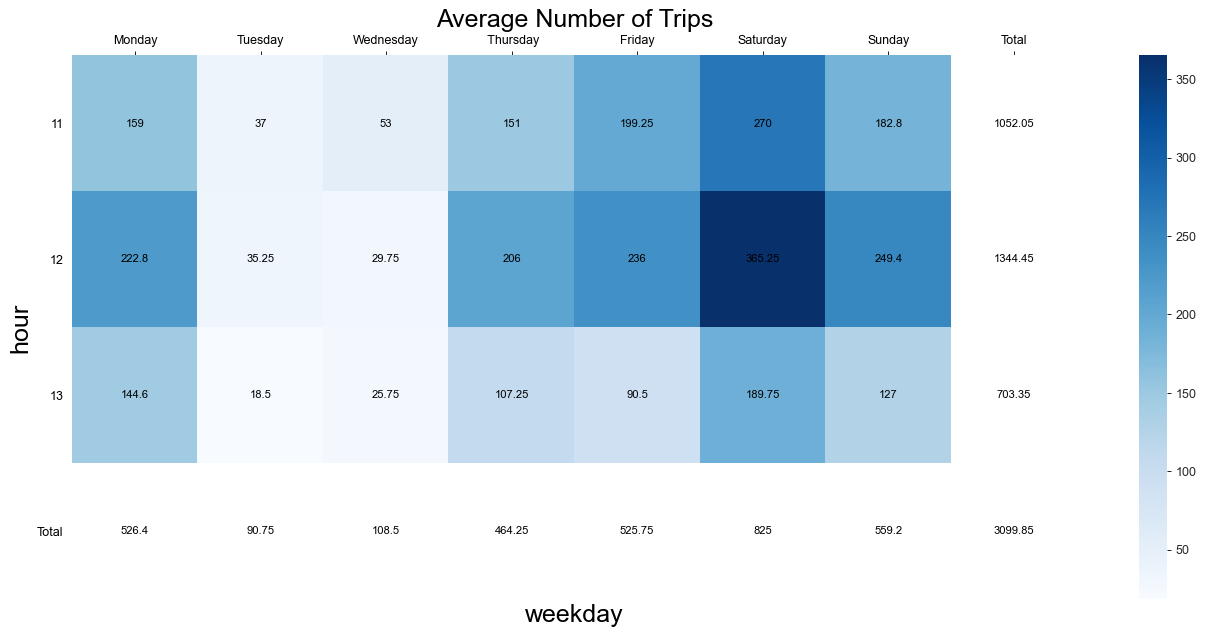

In [204]:
from matplotlib.collections import QuadMesh
from matplotlib.text import Text
import numpy as np

#Creating columns for hour of weekday
#weekdaymatrix = pd.DataFrame()
#weekdaymatrix['Weekday'] = pd.DatetimeIndex(crime.index).weekday

#Manipulating data to feed pivot table to then feed to seaborn heatmap
incidents_wh = data.groupby(['Weekday', 'hour'])['trips'].mean()
incidents_wh = incidents_wh.reset_index(level=[0,1]) # to go from mutlindex to singleidnex
pivoted_table = incidents_wh.pivot(index='hour', columns='Weekday', values='trips')
pivoted_table.fillna(0, inplace=True)

#Select max value from the data
max_value = pivoted_table.max().max()

#Create sum for rows and columns
pivoted_table.loc['Total'] = pivoted_table.sum()
pivoted_table = pd.concat([pivoted_table,pd.DataFrame(pivoted_table.sum(axis=1),columns=['Total'])],axis=1)

#Generate heatmap
plt.figure(figsize=(18, 8), dpi=90)
ax = sns.heatmap(pivoted_table, cmap='Blues', annot=True, fmt='g', annot_kws={'size': 9}, vmax=max_value)

#Set white color to total column and row
# find your QuadMesh object and get array of colors
quadmesh = ax.findobj(QuadMesh)[0]
facecolors = quadmesh.get_facecolors()

# make colors of the last column white
column_number = pivoted_table.shape[1]
cells_number = pivoted_table.shape[0]*pivoted_table.shape[1]
last_row = pivoted_table.shape[1]*(pivoted_table.shape[0]-1)

facecolors[np.arange(column_number-1,cells_number,column_number)] = np.array([1,1,1,1]) #change column total to white
facecolors[np.arange(last_row, cells_number,1)] = np.array([1,1,1,1]) #change row total to white

# set modified colors
quadmesh.set_facecolors = facecolors

# set color of all text to black
for i in ax.findobj(Text):
    i.set_color('black') 

#Labels
labels = ['Monday', 'Tuesday', 'Wednesday',' Thursday', 'Friday', 'Saturday', 'Sunday', 'Total']
ax.set_xticklabels(labels)
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.title('Average Number of Trips', fontsize=20, y=1.05)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('hour', fontsize=20);

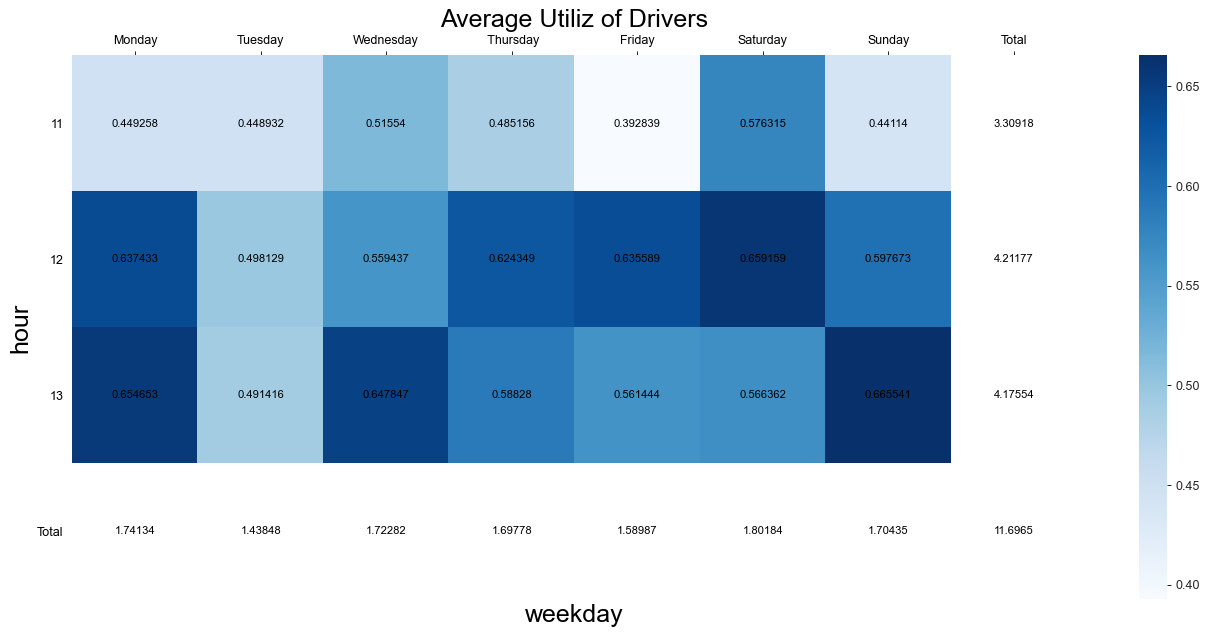

In [205]:
from matplotlib.collections import QuadMesh
from matplotlib.text import Text
import numpy as np

#Creating columns for hour of weekday
#weekdaymatrix = pd.DataFrame()
#weekdaymatrix['Weekday'] = pd.DatetimeIndex(crime.index).weekday

#Manipulating data to feed pivot table to then feed to seaborn heatmap
incidents_wh = data.groupby(['Weekday', 'hour'])['utiliz'].mean()
incidents_wh = incidents_wh.reset_index(level=[0,1]) # to go from mutlindex to singleidnex
pivoted_table = incidents_wh.pivot(index='hour', columns='Weekday', values='utiliz')
pivoted_table.fillna(0, inplace=True)

#Select max value from the data
max_value = pivoted_table.max().max()

#Create sum for rows and columns
pivoted_table.loc['Total'] = pivoted_table.sum()
pivoted_table = pd.concat([pivoted_table,pd.DataFrame(pivoted_table.sum(axis=1),columns=['Total'])],axis=1)

#Generate heatmap
plt.figure(figsize=(18, 8), dpi=90)
ax = sns.heatmap(pivoted_table, cmap='Blues', annot=True, fmt='g', annot_kws={'size': 9}, vmax=max_value)

#Set white color to total column and row
# find your QuadMesh object and get array of colors
quadmesh = ax.findobj(QuadMesh)[0]
facecolors = quadmesh.get_facecolors()

# make colors of the last column white
column_number = pivoted_table.shape[1]
cells_number = pivoted_table.shape[0]*pivoted_table.shape[1]
last_row = pivoted_table.shape[1]*(pivoted_table.shape[0]-1)

facecolors[np.arange(column_number-1,cells_number,column_number)] = np.array([1,1,1,1]) #change column total to white
facecolors[np.arange(last_row, cells_number,1)] = np.array([1,1,1,1]) #change row total to white

# set modified colors
quadmesh.set_facecolors = facecolors

# set color of all text to black
for i in ax.findobj(Text):
    i.set_color('black') 

#Labels
labels = ['Monday', 'Tuesday', 'Wednesday',' Thursday', 'Friday', 'Saturday', 'Sunday', 'Total']
ax.set_xticklabels(labels)
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.title('Average Utiliz of Drivers', fontsize=20, y=1.05)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('hour', fontsize=20);

1.7.Relationship between Workday, Weekend and Each Variale

According to the mean value, we found that:
(1)Customers have far more average trips and request than in workday.

(2) the average value of 'supply hour' and 'Average minutes of Trips' are also larger in weekend than in workday.

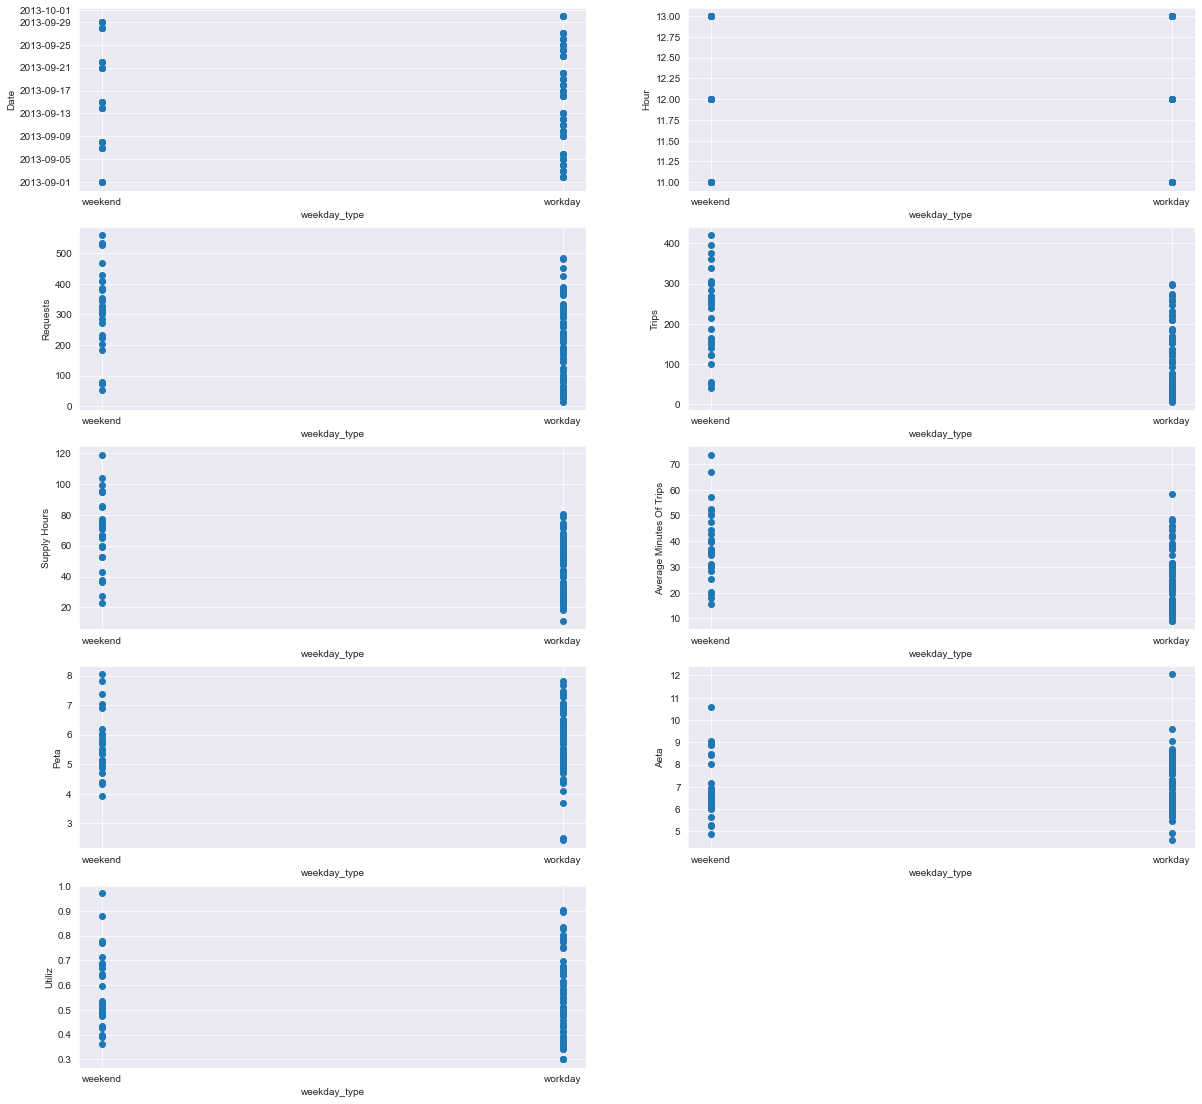

In [196]:
data.loc[data['Weekday'] <= 5, 'weekday_type'] = 'workday'
data.loc[data['Weekday'] > 5, 'weekday_type'] = 'weekend'
data


plt.figure(figsize=(20,19.5))
plot_count = 1
for feature in list(data.columns)[:9]:
        plt.subplot(5,2,plot_count)
        plt.scatter( data['weekday_type'],data[feature])
        plt.ylabel(feature.replace('_',' ').title())
        plt.xlabel('weekday_type')
        plot_count+=1

plt.show()

In [197]:
data.groupby("weekday_type").agg([np.mean,np.sum,np.std])

hour                  requests                          trips  \
             mean  sum       std       mean    sum         std        mean   
weekday_type                                                                 
weekend        12  324  0.832050  318.62963   8603  131.071662  225.777778   
workday        12  756  0.823055  198.31746  12494  133.470768  117.285714   

                               supply hours                      \
               sum         std         mean      sum        std   
weekday_type                                                      
weekend       6096  107.311313    69.262593  1870.09  23.871485   
workday       7389   86.921995    45.754762  2882.55  17.832523   

             average minutes of trips                          pETA          \
                                 mean      sum        std      mean     sum   
weekday_type                                                                  
weekend                     39.120741  1056.26  14.310139  5.687778  153.57   
workday                     24.735873  1558.36  12.098108  5.788889  364.70   

                            aETA                     utiliz             \
                   std      mean     sum       std     mean        sum   
weekday_type                                                             
weekend       1.015167  6.997037  188.92  1.331092  0.58256  15.729115   
workday       1.111789  7.285556  458.99  1.199132  0.54766  34.502550   

                              Day                  Weekday                 
                   std       mean  sum       std      mean  sum       std  
weekday_type                                                               
weekend       0.151505  16.111111  435  9.295712  6.555556  177  0.506370  
workday       0.162941  15.238095  960  8.501830  2.904762  183  1.455959

1.8.Relationship between Time Interval and Each Variale

We found:

(1)There were more orders on Saturday at 12:00 than in other periods, and on Tuesday at 13:00 had the least.

(2)There were the least orders on Tuesday and the most on Saturdays.

(3)12:00 have the most requests compared with other time interval.

(4)There is a minimum utility value at 11:00 on Friday and a maximum utility value at 13:00 on Sunday.

(5)The driver's utilize in 11:00 is the least than other time periods.

(6)For the number of supply hour and average trip time, 12:00 have the largest value. 11:00 have the least value.

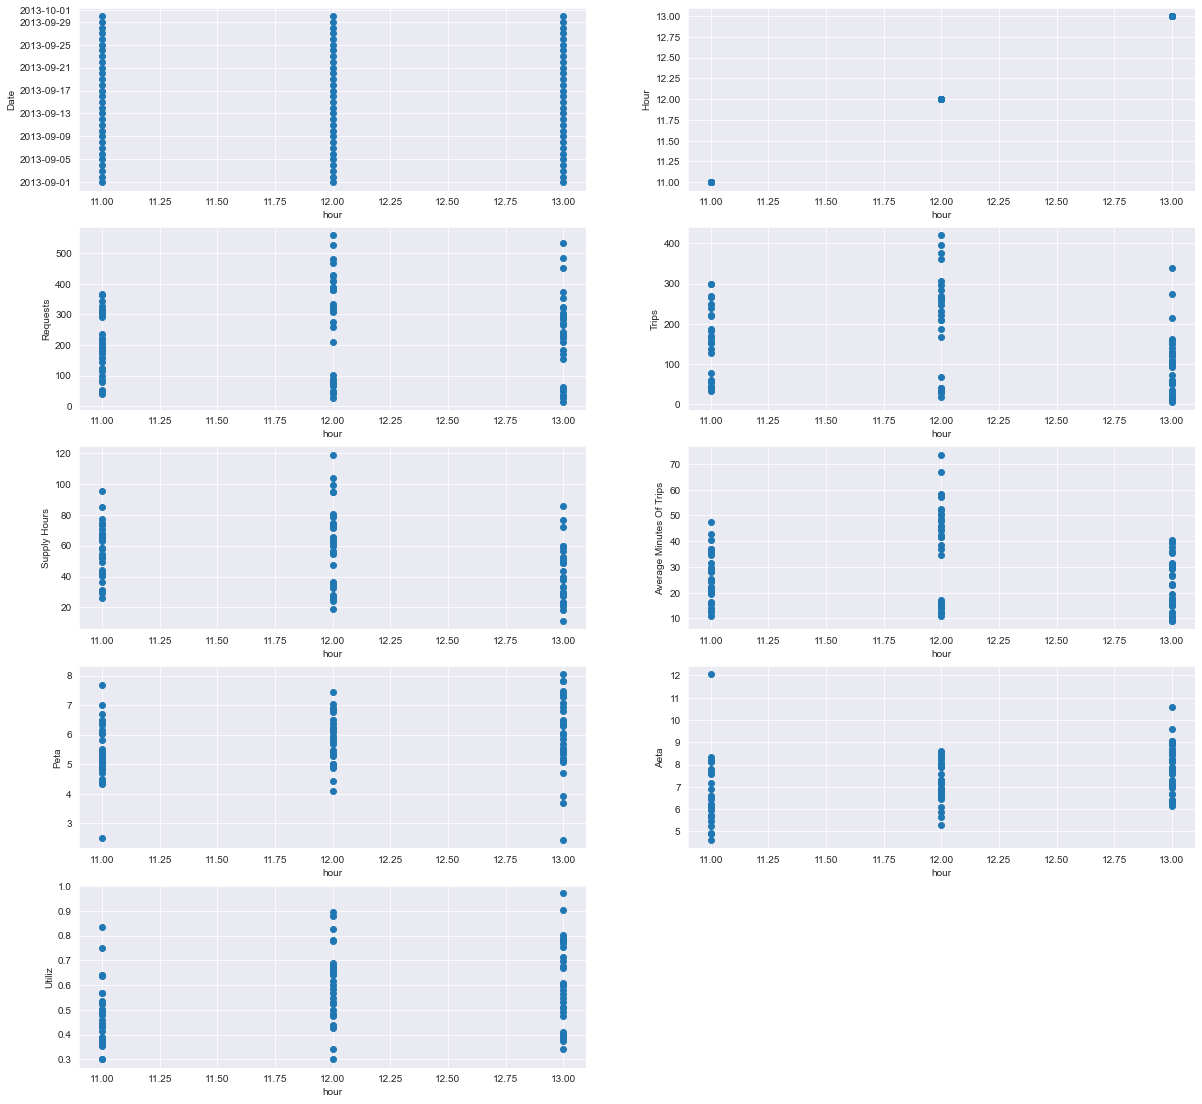

In [198]:
plt.figure(figsize=(20,19.5))
plot_count = 1
for feature in list(data.columns)[:9]:
        plt.subplot(5,2,plot_count)
        plt.scatter( data['hour'],data[feature])
        plt.ylabel(feature.replace('_',' ').title())
        plt.xlabel('hour')
        plot_count+=1

plt.show()

In [199]:
data.groupby("hour").agg([np.mean,np.sum,np.std])

requests                         trips                   supply hours  \
            mean   sum         std        mean   sum         std         mean   
hour                                                                            
11    200.266667  6008  103.660232  151.666667  4550   87.908390    55.333667   
12    284.333333  8530  164.574128  195.000000  5850  126.747373    60.601000   
13    218.633333  6559  145.087960  102.833333  3085   77.180078    42.486667   

                         average minutes of trips                      \
          sum        std                     mean      sum        std   
hour                                                                    
11    1660.01  17.602008                   25.617   768.51   9.523610   
12    1818.03  26.668623                   37.176  1115.28  18.365004   
13    1274.60  18.714666                   24.361   730.83  10.007602   

          pETA                        aETA                      utiliz  \
          mean     sum       std      mean     sum       std      mean   
hour                                                                     
11    5.397333  161.92  0.986743  6.611000  198.33  1.414317  0.470904   
12    5.860000  175.80  0.819243  7.253333  217.60  0.893468  0.602739   
13    6.018333  180.55  1.308816  7.732667  231.98  1.123842  0.600746   

                            Day                Weekday                 
            sum       std  mean  sum       std    mean  sum       std  
hour                                                                   
11    14.127117  0.129224  15.5  465  8.803408       4  120  2.117253  
12    18.082181  0.144147  15.5  465  8.803408       4  120  2.117253  
13    18.022368  0.169851  15.5  465  8.803408       4  120  2.117253

1.9.Pearson Coefficient

We found：

(1)There was a negative correlation between utility and supply hour.

(2)Interestingly, there is a negative correlation between PETA and request and trips, which means that when the order volume increases, the company's estimated waiting time for passengers will be shorter.

(3)From 11:00 to 12:00, the order volume decreases with time.

In [206]:
all_correlations = data.corr(method='pearson')
print(all_correlations)

                              hour  requests     trips  supply hours  \
hour                      1.000000  0.052659 -0.190054     -0.234614   
requests                  0.052659  1.000000  0.837015      0.654692   
trips                    -0.190054  0.837015  1.000000      0.880738   
supply hours             -0.234614  0.654692  0.880738      1.000000   
average minutes of trips -0.035950  0.810837  0.907870      0.827092   
pETA                      0.236269 -0.007639 -0.151332     -0.312910   
aETA                      0.371433  0.025894 -0.259215     -0.487399   
utiliz                    0.334071  0.413997  0.198133     -0.118937   
Day                       0.000000  0.152465  0.226271      0.314024   
Weekday                   0.000000  0.420478  0.408854      0.421520   

                          average minutes of trips      pETA      aETA  \
hour                                     -0.035950  0.236269  0.371433   
requests                                  0.810837 -0.00763

# 2. Advice to passenger operation team

(1)According to the data obtained, customers are more willing to take a taxi on weekends, especially on Saturdays. Therefore, the operation team should hold more operation activities on Saturdays to attract new customers, stimulate users' consumption and reserve old customers.

(2)In addition, customers' orders increase and then decrease with the passage of time, reaching the peak in the middle of a month, so the month is also a good time point for customers to operate.

(3)The company's estimated waiting time of passengers is actually far less than the actual waiting time of passengers. Wrong estimation will cause passengers to wait longer than expected, which will reduce customer experience, reduce satisfaction, increase the complaint rate, and even lose some impatient users. Secondly, the actual waiting time of customers has greater variance, and the company should also consider such problems when estimating the waiting time.At present, there are problems in the algorithms and calculation methods used to estimate customer waiting time.So, companies should adjust their own algorithms and constantly test the results of their own algorithms.The operation team can comfort and retain customers during the period of company adjustment.

# 3. Advice to driver operation team

(1) According to the study, trips on Tuesday were significantly lower than other periods. Generally speaking, customers are unlikely to change their travel demands suddenly in a short time. At the same time, we noticed that the supply hours of drivers on Tuesdays was far less than the time period. We have reason to suspect that the insufficient supply of drivers on Tuesday may have led to a substantial reduction in customer orders. The operation team should look for the reasons for the sharp drop in the supply hours of drivers on Tuesday, try to improve the supply hours of drivers on Tuesday, and pay close attention to the supply hours in the follow-up The relationship between hour and trips. This will effectively help the company to increase the number of orders, to achieve profit.The operation team should try to launch a driver attraction campaign at this time point on Tuesday, trying to recruit more drivers to pick up orders.

# 4. State further data needed if deepen analysis

（1）Weather is an important reason for people to use taxis, but the data does not give the weather conditions at that time point, which will increase the probability of outlier. Therefore, the weather conditions at each time of the day are very important. If conditions permit, the geographical scope should be reduced from the city to the administrative unit of the district. 
（2）In addition, holidays are also an important factor and should be taken into account.
（3）Red Pocket and some subsidy policies should also be taken into account. Generally speaking, red pocket on weekends are larger and more than those at other times. This will strengthen customers' willingness to take a taxi and increase the number of passengers on weekends. Therefore, the policy of subsidy needs to be noted, and the data of customer use allowance should also be needed.